In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
npz_files = glob.glob('*x_large_P.npz')
data = [np.load(f, allow_pickle=True) for f in npz_files]
npz_files

['IEEE39_H_0.25x_large_P.npz', 'IEEE39_H_4x_large_P.npz']

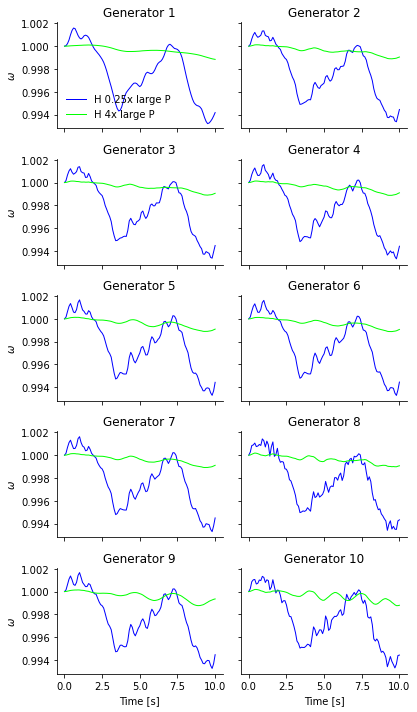

In [7]:
idx = data[0]['time'] < 10
n_gen = data[0]['speed'].shape[1]
fig,ax = plt.subplots(n_gen // 2, 2, sharex=True, sharey=True, figsize=(2 * 3, n_gen))
ax = [a for row in ax for a in row]
cmap = plt.get_cmap('brg', len(data))
for i,d in enumerate(data):
    for j,a in enumerate(ax):
        a.plot(d['time'][idx], d['speed'][idx,j], color=cmap(i), lw=1, 
               label=' '.join(os.path.splitext(npz_files[i])[0].split('_')[1:]))
        a.set_title(f'Generator {j+1}')
        for side in 'right','top':
            a.spines[side].set_visible(False)
        if j >= n_gen - 2:
            a.set_xlabel('Time [s]')
        if j % 2 == 0:
            a.set_ylabel(r'$\omega$')
ax[0].legend(loc='best', frameon=False)
fig.tight_layout()
fig.savefig('omega_gen_variable_H.pdf')

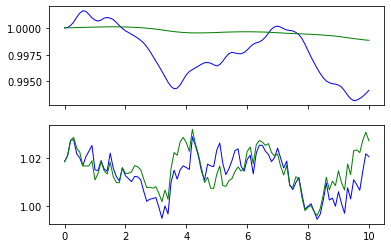

In [8]:
idx = data[0]['time'] < 10
fig,ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(data[0]['time'][idx], data[0]['speed'][idx,0], 'b', lw=1)
ax[0].plot(data[-1]['time'][idx], data[-1]['speed'][idx,0], 'g', lw=1)
ax[1].plot(data[0]['time'][idx], data[0]['Vd'][idx,0], 'b', lw=1)
ax[1].plot(data[-1]['time'][idx], data[-1]['Vd'][idx,0], 'g', lw=1)

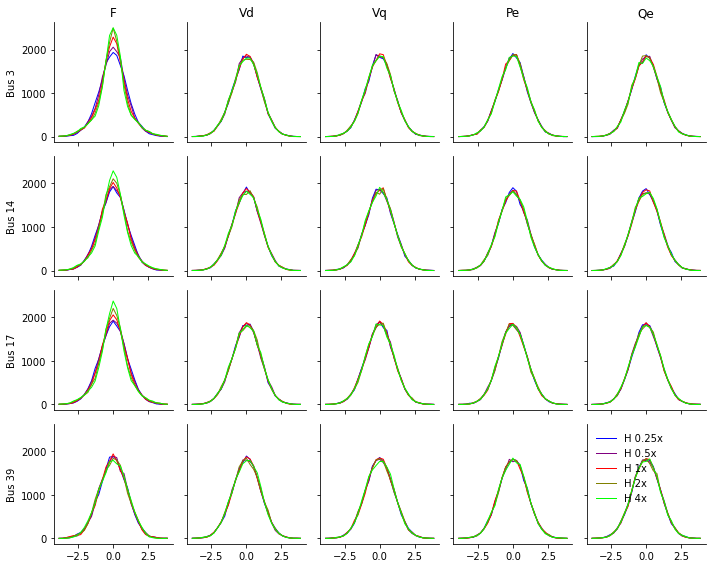

In [5]:
bus_IDs = (3, 14, 17, 39)
n_buses = 4
var_names = ('F_norm', 'Vd_norm', 'Vq_norm', 'Pe_norm', 'Qe_norm')
n_vars = len(var_names)

rng = (-4,4)
n_bins = 31

fig,ax = plt.subplots(n_buses, n_vars, sharex=True, sharey=True, figsize=(n_vars * 2, n_buses * 2))
cmap = plt.get_cmap('brg', len(data))
for i in range(n_buses):
    for j in range(n_vars):
        for k,d in enumerate(data):
            x = d[var_names[j]][:,i]
            hist,edges = np.histogram(x, bins=n_bins, range=rng)
            ax[i,j].plot(edges[:-1] + np.diff(edges[:2])[0] / 2, hist, color=cmap(k),
                         lw=1, label=' '.join(os.path.splitext(npz_files[k])[0].split('_')[1:]))
            for side in 'right','top':
                ax[i,j].spines[side].set_visible(False)
ax[-1,-1].legend(loc='upper left', frameon=False)
for i,var_name in enumerate(var_names):
    ax[0,i].set_title(var_name.split('_')[0])
for i,bus_ID in enumerate(bus_IDs):
    ax[i,0].set_ylabel(f'Bus {bus_ID}')
fig.tight_layout()
fig.savefig('bus_vars_variable_H.pdf')